In [15]:
from renom.utility.distributor import ImageClassificationDistributor
from renom.utility.distributor.imageloader import ImageLoader
from renom.utility.image import *
import matplotlib.pyplot as plt
import numpy as np
import math
import os

In [16]:
def load_for_classification(path):
    # ファイル名、ディレクトリ名の一覧を取得
    class_list = os.listdir(path)
    onehot_vectors = []
    for i in range(len(class_list)):
        # ディレクトリ（画像のカテゴリ）の数分の要素数の配列
        # ループのインデックスの箇所の要素だけが1の配列を生成
        temp = [0] * len(class_list)
        temp[i] = 1
        # その配列が one-hot ベクトルなので、append
        onehot_vectors.append(temp)
    # print(temp)
    # print(onehot_vectors)
    X_list = []
    y_list = []
    # 各カテゴリのディレクトリ毎に for ループを回す
    for classname in class_list:
        # 各カテゴリのディレクトリの中に格納されている画像ファイルの一覧を取得
        imglist = os.listdir(path + classname)
        # 各カテゴリのディレクトリの画像ごとに for ループを回す
        for filename in imglist:
            filepath = path + classname + "/" + filename
            # 各画像のパスを配列に格納
            X_list.append(filepath)
            # 各カテゴリの one-hot ベクトルを取得
            onehot = onehot_vectors[class_list.index(classname)]
            # 画像のカテゴリのパスは one-hot ベクトルで表現されている
            y_list.append(onehot)

    return X_list, y_list, class_list

In [17]:
def get_class_from_onehot(onehot_vector, class_list):
    # one-hot ベクトルなので、1 は配列の要素中に1つだけ、そのインデックスを取得
    # そのインデックスから、カテゴリを取得
    return class_list[onehot_vector.index(1)]

In [18]:
def imshow_batch(images):
    # TODO: 読み解けていない    
    n_images = images.shape[0]
    images = images.astype(np.uint8)
    map_width = int(math.ceil(math.sqrt(n_images)))
    map_height = int(math.ceil(n_images / map_width))
    for h in range(map_height):
        for w in range(map_width):
            if (w==0) and (h*map_width+w < n_images):
                temp_concatenated_image = images[h*map_width+w]
            elif h*map_width+w < n_images:
                temp_concatenated_image = np.concatenate(
                      (temp_concatenated_image, images[h*map_width+w]), axis=1)
            elif (w==0) and (h*map_width+w >= n_images):
                temp_concatenated_image = np.zeros(
                      images[0].shape, dtype=images[0].dtype)
            else:
                temp_concatenated_image = np.concatenate((temp_concatenated_image, np.zeros(
                         images[0].shape, dtype=images[0].dtype)), axis=1)
        if h==0:
            concatenated_image = temp_concatenated_image
        else:
            concatenated_image = np.concatenate(
                    (concatenated_image, temp_concatenated_image), axis=0)

    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(concatenated_image)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

watch
airplanes
trilobite
car_side
hedgehog
camera
menorah
BACKGROUND_Google
snoopy
laptop
elephant
watch


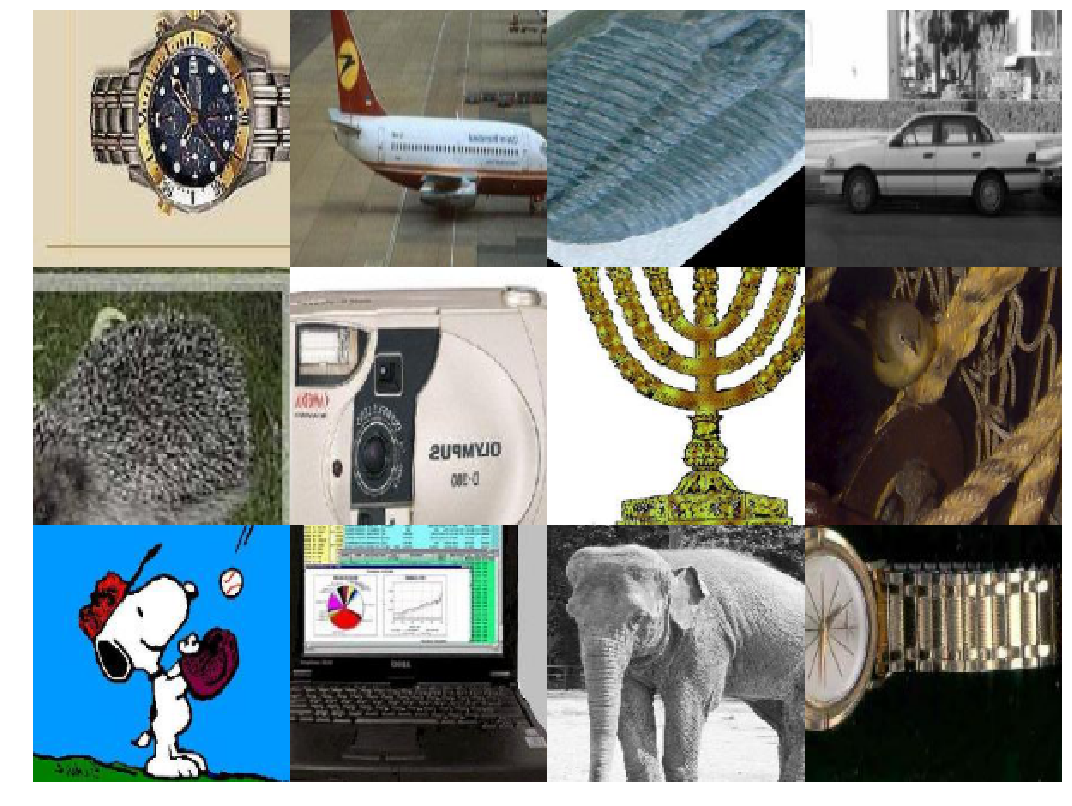

In [33]:
path = "101_ObjectCategories/"
# 画像データと画像のカテゴリのリスト（one-hot ベクトル）を取得
X_list, Y_list, class_list = load_for_classification(path)

# 画像をリサイズ
augmentation = DataAugmentation([\
                 Crop(left_top=(50,50), size=(150,150)),
                 ],
                 random = True)


# なにしてるんだろう？
# 画像の受け皿のインスタンスかな？
distributer = ImageClassificationDistributor(image_path_list=X_list,
                                             y_list = Y_list,
                                             class_list = class_list,
                                             imsize=(200, 200),
                                             color="RGB",
                                             augmentation=augmentation)

#  ランダムに画像とその画像のカテゴリを表示
for (x,y) in distributer.batch(12, shuffle=True):
    for label in y:
        print(get_class_from_onehot(label.tolist(), class_list))
    images = x.transpose((0,2,3,1))
    imshow_batch(x.transpose((0,2,3,1)))
    break